In [123]:
# Sklearn
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, f1_score

# Plotting tools
import matplotlib.pyplot as plt

# Other modules
import pandas as pd
import numpy as np

In [124]:
# Load training and testing data
train_data = pd.read_csv('train_midterm.csv')
test_data = pd.read_csv('test_midterm.csv')

X = train_data.drop(labels="label", axis=1).values
y = train_data["label"].values

X_test = test_data.drop(labels="label", axis=1).values
y_test = test_data["label"].values

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (4459, 1364)
Shape of y: (4459,)


In [125]:
class LogisticRegression:

  def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.train_losses = []  # Store training losses for each epoch
        self.val_losses = []  # Store validation losses for each epoch

  # Initialize the weights
  def initialize_W(self, features):
    self.weights = np.zeros(features)
    return self.weights

  # Sigmoid function
  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

  # log = logistics
  def log_loss(self, y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

  def fit(self, X, y, X_val, y_val):
        n_samples = X.shape[0]
        self.initialize_W(X.shape[1])

        for epoch in range(self.epochs):
            for i in range(n_samples):

                # Compute the linear combination of weights and features
                linear_model = np.dot(X[i], self.weights)
                y_pred = self.sigmoid(linear_model)

                # Update weights using SGD
                gradient = (y_pred - y[i]) * X[i]
                self.weights -= self.learning_rate * gradient

            # Calculate and store training and validation loss for this epoch
            train_loss = self.log_loss(y, self.predict_prob(X))
            val_loss = self.log_loss(y_val, self.predict_prob(X_val))
            self.train_losses.append(train_loss)
            self.val_losses.append(val_loss)
        return self.weights

  def predict_prob(self, X):
    linear_model = np.dot(X, self.weights)
    return self.sigmoid(linear_model)

  def predict(self, X, threshold=0.5):
    probabilities = self.predict_prob(X)
    return (probabilities >= threshold).astype(int)



In [126]:
 # For storing evaluation outputs
results = []
#all_train_losses = []
#all_val_losses = []

 # Define the Hyperparameters
learning_rates = [0.1, 0.01, 0.001]
epochs = [50, 200, 500]

 # For storing the best parameters
best_learning_rate = None
best_epoch = None
best_loss = float('inf')
best_model = None


In [127]:
# Going through the all possible combinations of the hyperparameters
for learn_rate in learning_rates:
   for epoch in epochs:
      # For storing the train and val loss for one hyperparameter combination
      train_losses = []
      val_losses = []

      # N fold cross validation starts
      for train_index, val_index in KFold(n_splits=5, shuffle=True, random_state=777).split(X):
            # Splitting data train and data validation
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            # Define and train the model
            model = LogisticRegression(learning_rate=learn_rate, epochs=epoch)
            model.fit(X_train, y_train, X_val, y_val)

            # Evaluate the model on the training and validation set
            train_loss = model.log_loss(y_train, model.predict_prob(X_train))
            val_loss = model.log_loss(y_val, model.predict_prob(X_val))
            train_losses.append(train_loss)
            val_losses.append(val_loss)

      avg_train_loss = np.mean(train_losses)
      avg_val_loss = np.mean(val_losses)

      print(f"Mean training loss: {avg_train_loss :.4f} -- Mean validation loss: {avg_val_loss:.4f} -- Hyperparameters: (Learning rate: {learn_rate}, Epoch: {epoch})")

      results.append((learn_rate, epoch, avg_train_loss, avg_val_loss))
      #all_train_losses.extend(train_losses)
      #all_val_losses.extend(val_losses)
      # Determining the hyperparameters with the best loss
      if avg_val_loss < best_loss:
        best_loss = avg_val_loss
        best_learning_rate = learn_rate
        best_epoch = epoch
        best_model = model

print(f"\n--------------------- Best Spam Detection with Hyperparameters = (Best Learning rate: {best_learning_rate}, Best Epoch: {best_epoch}) ---------------------")
print(f"\nTraining Loss: {best_loss : .4f}")


Mean training loss: 0.0326 -- Mean validation loss: 0.1371 -- Hyperparameters: (Learning rate: 0.1, Epoch: 50)
Mean training loss: 0.0173 -- Mean validation loss: 0.1695 -- Hyperparameters: (Learning rate: 0.1, Epoch: 200)
Mean training loss: 0.0128 -- Mean validation loss: 0.2062 -- Hyperparameters: (Learning rate: 0.1, Epoch: 500)
Mean training loss: 0.0997 -- Mean validation loss: 0.1479 -- Hyperparameters: (Learning rate: 0.01, Epoch: 50)
Mean training loss: 0.0523 -- Mean validation loss: 0.1320 -- Hyperparameters: (Learning rate: 0.01, Epoch: 200)
Mean training loss: 0.0330 -- Mean validation loss: 0.1370 -- Hyperparameters: (Learning rate: 0.01, Epoch: 500)
Mean training loss: 0.2274 -- Mean validation loss: 0.2429 -- Hyperparameters: (Learning rate: 0.001, Epoch: 50)
Mean training loss: 0.1424 -- Mean validation loss: 0.1737 -- Hyperparameters: (Learning rate: 0.001, Epoch: 200)
Mean training loss: 0.0999 -- Mean validation loss: 0.1480 -- Hyperparameters: (Learning rate: 0.001

Test Loss:  0.1235
Test Accuracy:  0.9570
Test F1 Score:  0.8596


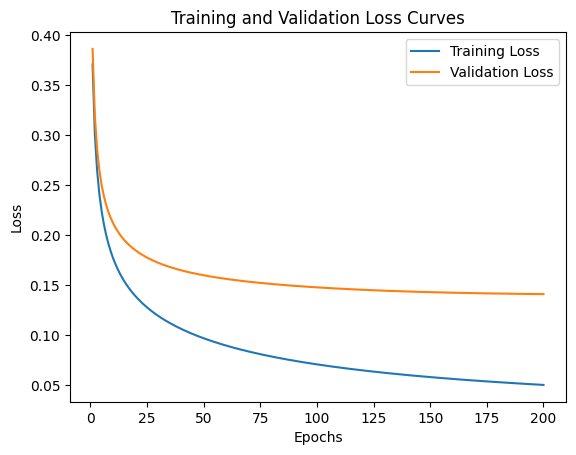

In [128]:
 # Using the model for the test data
y_test_predict_prob = best_model.predict_prob(X_test)
y_test_predict = best_model.predict(X_test)

loss = best_model.log_loss(y_test, y_test_predict_prob)
accuracy = accuracy_score(y_test, y_test_predict)
f1 = f1_score(y_test, y_test_predict)

print(f"Test Loss: {loss : .4f}")
print(f"Test Accuracy: {accuracy : .4f}")
print(f"Test F1 Score: {f1 : .4f}")

 # Plot training and validation loss curves
plt.plot(range(1, best_model.epochs + 1), best_model.train_losses, label='Training Loss')
plt.plot(range(1, best_model.epochs + 1), best_model.val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()